In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 

t_u.shape

torch.Size([11, 1])

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([10,  0,  4,  7,  9,  1,  2,  3,  8]), tensor([6, 5]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[3.8517],
        [5.2412]], grad_fn=<AddmmBackward>)

In [6]:
linear_model.weight

Parameter containing:
tensor([[0.9264]], requires_grad=True)

In [7]:
linear_model.bias

Parameter containing:
tensor([0.7113], requires_grad=True)

In [8]:
x = torch.ones(1)
print(x)
linear_model(x)

tensor([1.])


tensor([1.6376], grad_fn=<AddBackward0>)

In [9]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.6376],
        [1.6376],
        [1.6376],
        [1.6376],
        [1.6376],
        [1.6376],
        [1.6376],
        [1.6376],
        [1.6376],
        [1.6376]], grad_fn=<AddmmBackward>)

In [13]:
# nn.Linear?

In [14]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [15]:
linear_model.parameters()

<generator object Module.parameters at 0x7f63e1dd3a98>

In [16]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.8653]], requires_grad=True), Parameter containing:
 tensor([0.0895], requires_grad=True)]

In [18]:
#ordinary loss)fn
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'.format(
                epoch, float(loss_train), float(loss_val)))


In [19]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 132.7920379638672, Validation loss 12.967214584350586
Epoch 1000, Training loss 3.9076690673828125, Validation loss 1.4652607440948486
Epoch 2000, Training loss 2.940823554992676, Validation loss 2.93426775932312
Epoch 3000, Training loss 2.9058032035827637, Validation loss 3.3975796699523926

Parameter containing:
tensor([[5.5002]], requires_grad=True)
Parameter containing:
tensor([-18.1406], requires_grad=True)


In [20]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)

print(linear_model.bias)

Epoch 1, Training loss 126.4397201538086, Validation loss 10.484070777893066
Epoch 1000, Training loss 3.966630458831787, Validation loss 1.4427589178085327
Epoch 2000, Training loss 2.9429564476013184, Validation loss 2.9188036918640137
Epoch 3000, Training loss 2.905879259109497, Validation loss 3.394237995147705

Parameter containing:
tensor([[5.4996]], requires_grad=True)
Parameter containing:
tensor([-18.1370], requires_grad=True)


In [22]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>


In [23]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [24]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [25]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [26]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [27]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [28]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2535], requires_grad=True)

In [29]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 227.2848358154297, Validation loss 39.25408935546875
Epoch 1000, Training loss 9.191866874694824, Validation loss 10.35805892944336
Epoch 2000, Training loss 4.646851539611816, Validation loss 8.965827941894531
Epoch 3000, Training loss 2.6157498359680176, Validation loss 7.805502891540527
Epoch 4000, Training loss 1.8418312072753906, Validation loss 7.047236442565918
Epoch 5000, Training loss 1.6177542209625244, Validation loss 6.73807954788208
output tensor([[-0.2270],
        [ 7.5037]], grad_fn=<AddmmBackward>)
answer tensor([[3.],
        [8.]])
hidden tensor([[-7.5322e+00],
        [-1.9430e-03],
        [ 7.4967e+00],
        [ 8.4733e-02],
        [ 1.1219e+01],
        [-1.0753e-01],
        [-1.0664e+01],
        [ 1.0680e+01]])


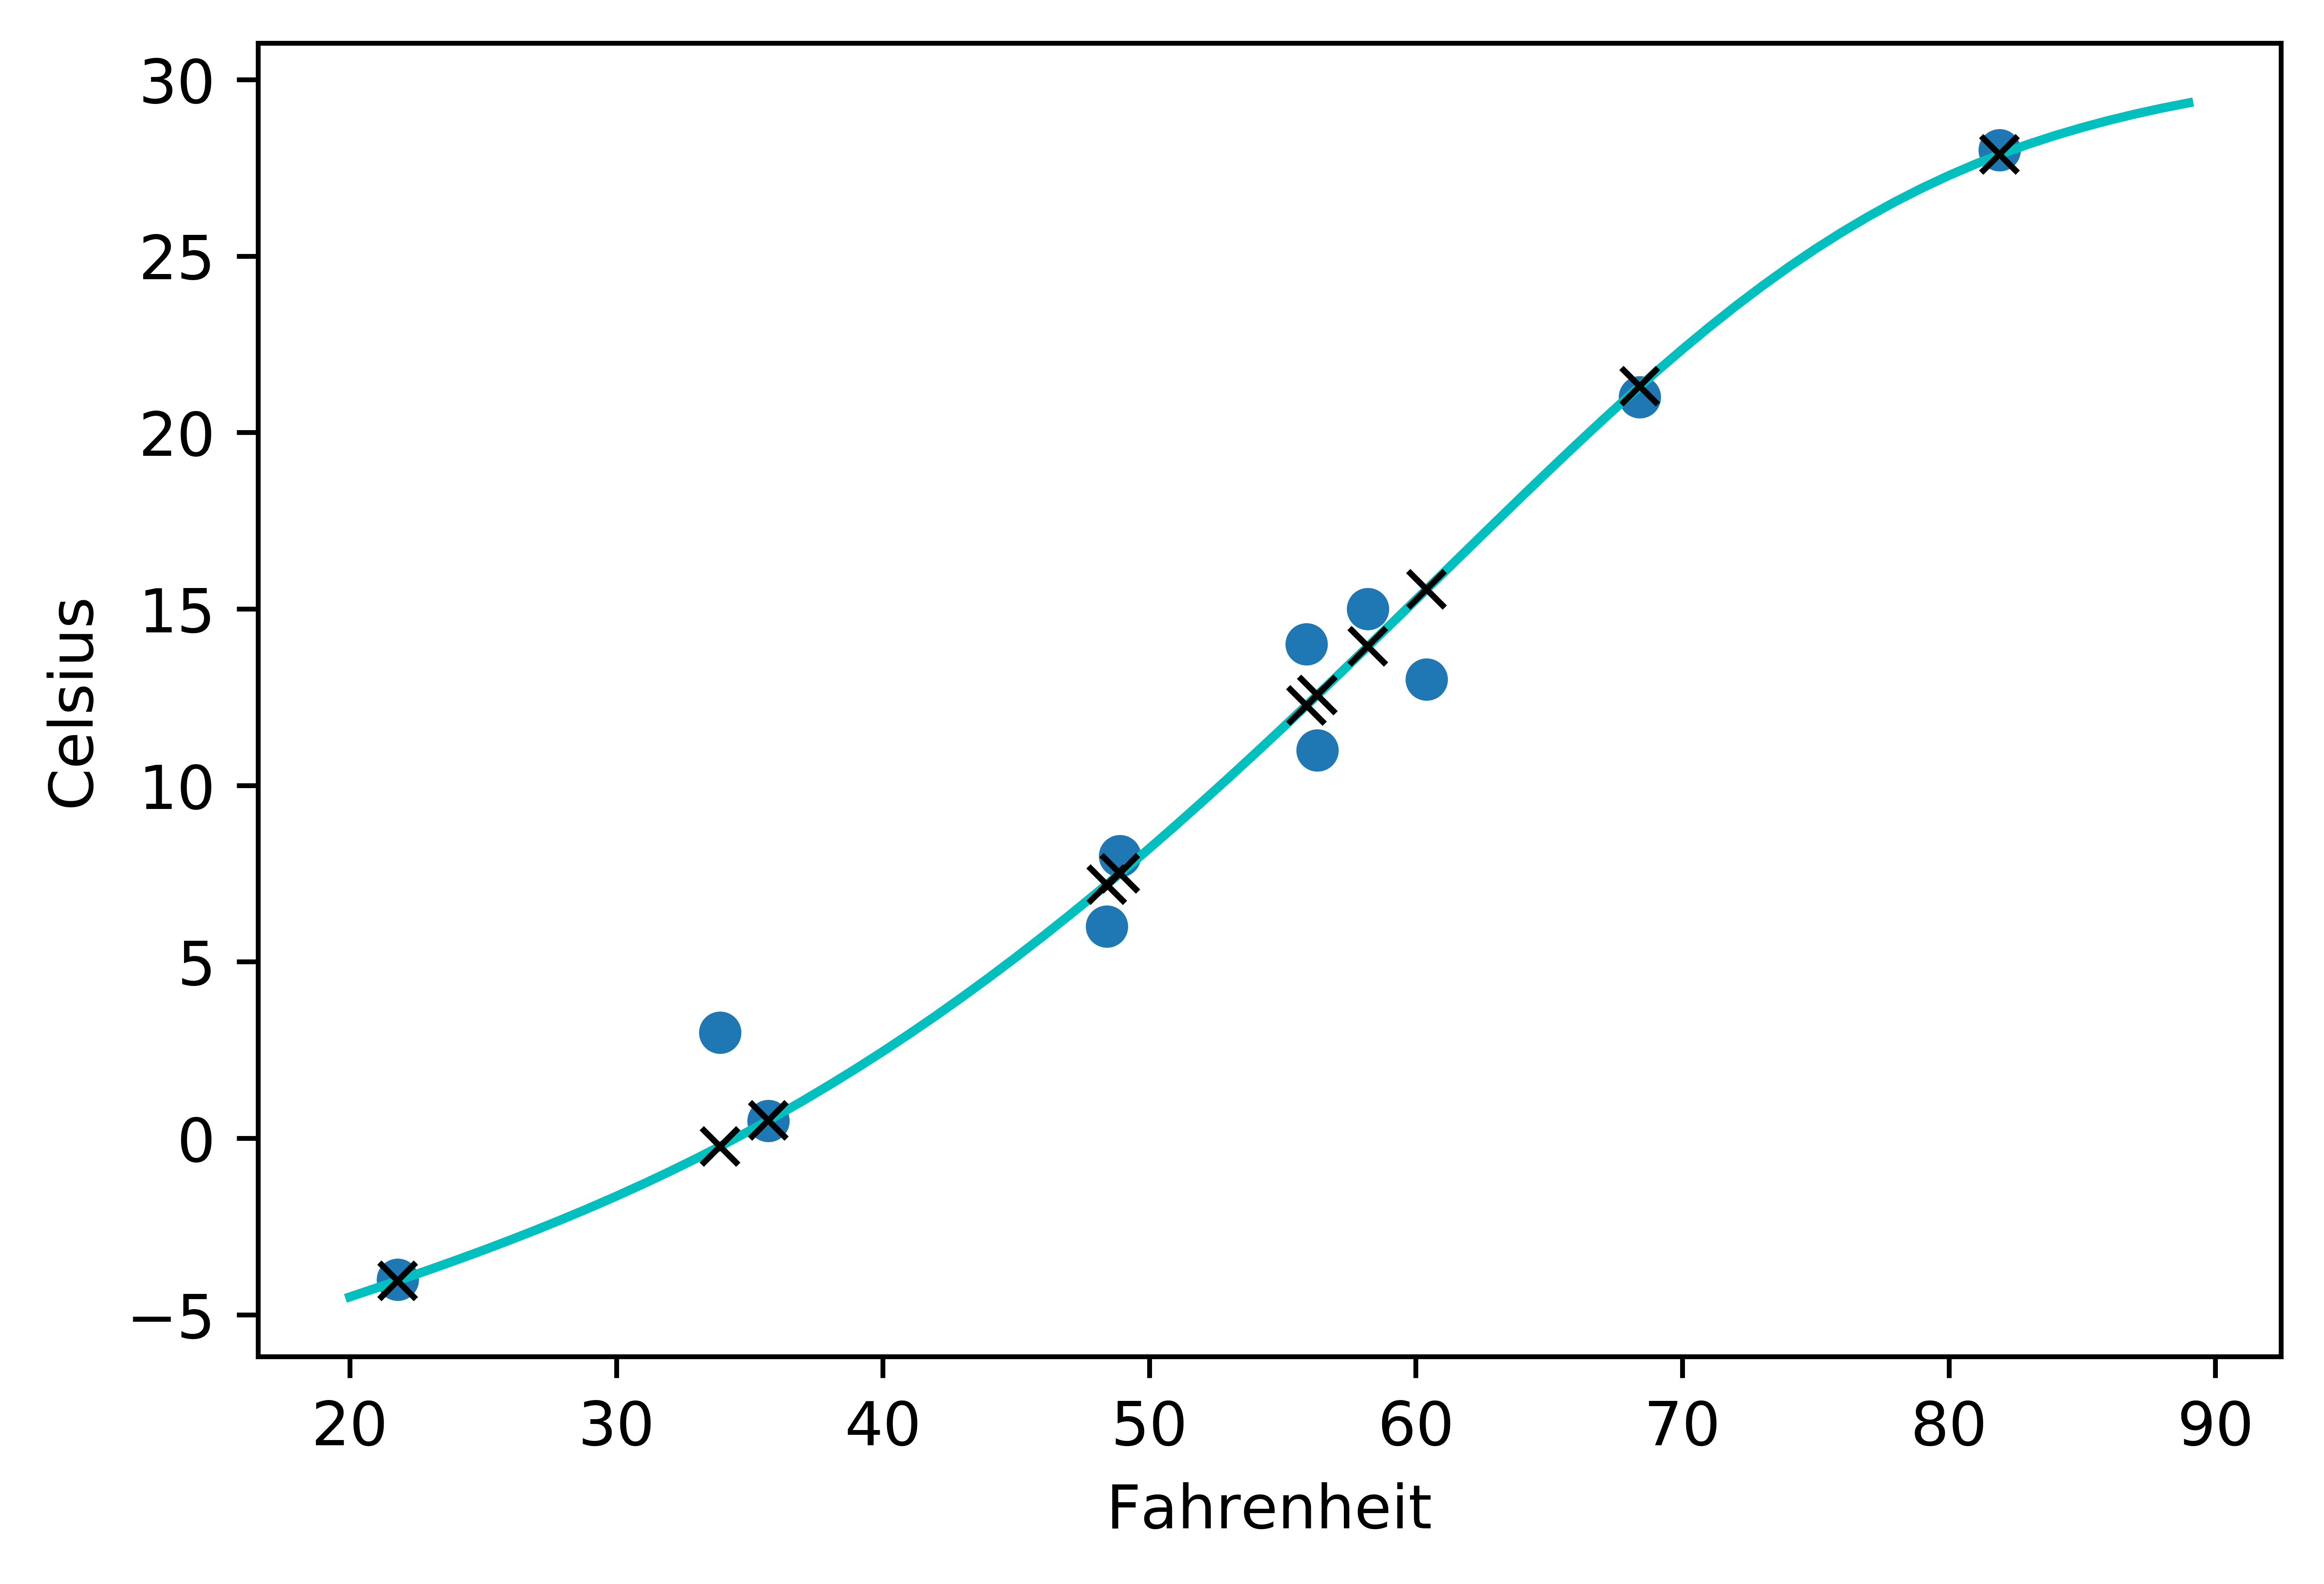

In [32]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=1000)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
